In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import math
from scipy import signal
from scipy.fftpack import fft
from scipy import ndimage
from scipy import special
import math
%matplotlib inline

In [2]:
def K(x,s):
    return(np.exp(-(x/s)**2))/s/np.sqrt(np.pi)

In [3]:
def STA(r, x, dt, window):
    negshift=round(window[0]/dt) # second
    posshift=round(window[1]/dt) # second
    xSTS = np.zeros(posshift-negshift)
    for i in np.arange(-negshift, len(r)-posshift):
        xSTS = xSTS + x[i+negshift:i+posshift]*r[i]
        
    xSTA = xSTS/sum(r[-negshift:len(r)-posshift])
    time = np.arange(negshift*dt, posshift*dt, dt)
    return time, xSTA

In [4]:
def Ay(k,g,alpha,beta,sigma_c, sigma_h,x,n = 1000):
    ans =  0
    for i in range(n+1):
        ans += k/alpha/np.sqrt(np.pi)*(-k*g/alpha/beta)**i/np.sqrt(sigma_c**2+i*sigma_h**2)*np.exp(-x**2/(sigma_c**2+i*sigma_h**2))
    return ans

In [5]:
sigma_h = 1# RF size of horizontal cell
sigma_c = sigma_h*1/3# RF size of cone cell
gamma = 1/(sigma_c**2)
klen = 2*sigma_h# half of width of horizontal kernal
dx = 0.01*sigma_h
##Create spatial kernal
klen = sigma_h*3
xx = np.arange(-klen,klen,dx)

KC = K(xx,sigma_c)
KH = K(xx,sigma_h)

In [6]:
#Width setting
xlen = 10*sigma_h #spatial extend of simulation
hw = 0.75*sigma_h#half bar width
tempx = np.arange(0,xlen,dx)

In [7]:
dt = 0.01
alpha = 1/0.024
beta = 1./1.
k = alpha
phi = 1.
g = beta*0.8

g*k*phi/alpha/beta

0.8000000000000002

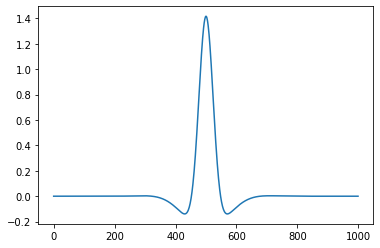

In [8]:
x = np.arange(-int(xlen/dx/2),int(xlen/dx/2))*dx
plt.plot(Ay(k,g,alpha,beta,sigma_c, sigma_h,x))

Whole Field STA

In [9]:
nstep = 5000

y = np.zeros(int(xlen/dx)) # cone cell output
z = np.zeros(int(xlen/dx)) # horizontal cell output
ry = np.convolve(y,KH,'same')# feedback from horizontal cell (y convoluted with horitonatl cell receptive field KH)
rz = np.convolve(z,KH,'same')# feedback from horizontal cell (z convoluted with horitonatl cell receptive field KH)



stm = np.zeros([int(xlen/dx),nstep])#input
rsp = np.zeros([int(xlen/dx),nstep])#y output
zts = np.zeros([int(xlen/dx),nstep])#horizontal

for i in range(nstep):
    s = np.ones(int(xlen/dx))*np.random.randn()*0.3+1
    rs = np.convolve(s,KC,'same')*dx
    
    dyj =(-alpha*y+k*(rs-phi*rz))*dt
    dzj =(-beta*z+g*y)*dt
    y = (y+dyj)
    z = (z+dzj)

    ry = np.convolve(y,KH,'same')# feedback from horizontal cell (y convoluted with horitonatl cell receptive field KH)
    rz = np.convolve(z,KH,'same')# feedback from horizontal cell (z convoluted with horitonatl cell receptive field KH)

    stm[:,i] = s
    rsp[:,i] = y
    zts[:,i] = z
    

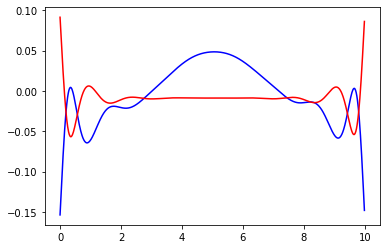

In [10]:
#####PLot numerical solution########
plt.plot(tempx,y,'b')#numerical solution
plt.plot(tempx,-z,'r')#numerical solution

choose center cell and a certain time before spike

In [11]:
output = rsp[int(xlen/dx/2),:]
time, xSTA = STA(output, stm[0,:], dt, [-0.25,0.25])
test = xSTA[:, np.newaxis]
for j in range(1, int(xlen/dx)):
    _, xSTA = STA(output, stm[j,:], dt, [-0.25,0.25])
    test = np.concatenate((test, xSTA[:, np.newaxis]), axis=1)

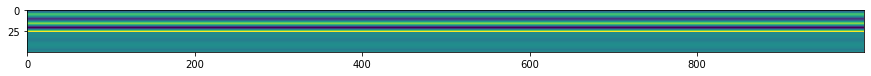

In [12]:
plt.imshow(test)
fig = plt.gcf()
fig.set_size_inches(15, 5)

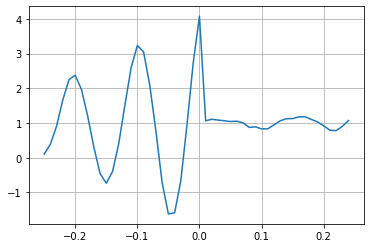

In [13]:
plt.plot(time, test[:, int(xlen/dx/2)])
plt.grid()

Checker spatial-temprol noise

In [14]:
nstep = 500000
v = 1.5*sigma_h
# pos_0 = 3*sigma_h#The center of the bar also where the bar start


y = np.zeros(int(xlen/dx)) # cone cell output
z = np.zeros(int(xlen/dx)) # horizontal cell output
ry = np.convolve(y,KH,'same')# feedback from horizontal cell (y convoluted with horitonatl cell receptive field KH)
rz = np.convolve(z,KH,'same')# feedback from horizontal cell (z convoluted with horitonatl cell receptive field KH)



rpeak = np.zeros(nstep)#Cone cell peak
gpeak = np.zeros(nstep)#Ganglion cell peak

stm = np.zeros([int(xlen/dx),nstep])#input
rsp = np.zeros([int(xlen/dx),nstep])#y output
zts = np.zeros([int(xlen/dx),nstep])#horizontal

for i in range(nstep):
    s = np.random.randn(int(xlen/dx))*0.3+1
#     s = np.random.randint(2, size=int(xlen/dx))*0.3+1
    rs = np.convolve(s,KC,'same')*dx
    
    dyj =(-alpha*y+k*(rs-phi*rz))*dt
    dzj =(-beta*z+g*y)*dt
    y = (y+dyj)
    z = (z+dzj)

    ry = np.convolve(y,KH,'same')# feedback from horizontal cell (y convoluted with horitonatl cell receptive field KH)
    rz = np.convolve(z,KH,'same')# feedback from horizontal cell (z convoluted with horitonatl cell receptive field KH)
    
    maxpos = np.argmax(y)
    rpeak[i]= maxpos*dx
    stm[:,i] = s
    rsp[:,i] = y
    zts[:,i] = z
    

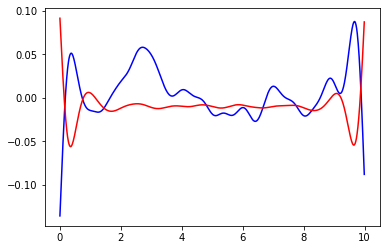

In [15]:
#####PLot numerical solution########
plt.plot(tempx,y,'b')#numerical solution
plt.plot(tempx,-z,'r')#numerical solution

choose center cell and a certain time before spike

In [ ]:
output = rsp[int(xlen/dx/2),:]
time, xSTA = STA(output, stm[0,:], dt, [-0.25,0.25])
test = xSTA[:, np.newaxis]
for j in range(1, int(xlen/dx)):
    _, xSTA = STA(output, stm[j,:], dt, [-0.25,0.25])
    test = np.concatenate((test, xSTA[:, np.newaxis]), axis=1)

In [ ]:
plt.imshow(test[:, 300:700])
fig = plt.gcf()
fig.set_size_inches(20, 5)

In [ ]:
plt.plot(test[23, :])
plt.grid()
fig = plt.gcf()
fig.set_size_inches(15, 5)